## STOCK MARKET ANALYSIS


## ALGORITHIMIC TRADING BOT BUILT IN PYTHON 

***by temitope olanipekun(ML/NLP  engr and chatbot developer)***

This is notebook is centered on having a good knowledge on how to implement a simple algorthimic bot for trading 

using the moving average cross over technique

we would discuss about moving averages......both the long moving average and short moving average using pandas

dataframe,we will also look at how to compute the buying and selling signals according to the moving average cross

over method,i also plotted them on an informative plot,where colours of dots determines what decision you will take

this is a good way to have first indicator  to know when to  buy and when you are to sell also.....

this is actualy better than emotional trading, or just normal intuitions which simply mans going to trade upon 

nothing



We would be building a trading bot for GAME STOP COPERATION,if you arent familiar with the company
    
They are concerned with video games,electronics,gaming merchandize and gaming accessories

and they have thier headquarters in texas

# importing the libraries

In [2]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt

## Getting the data
***Adjusting the moving averge window size***

In [129]:
start = datetime.datetime(2017,3,8)
end = datetime.datetime(2021,1,8)
stockTicker = "GME"
shortWindow = 50 #the fast moving average window size
longWindow = 100 # the slow moving average window size

In [130]:
stock = web.DataReader(stockTicker,"yahoo",start,end)
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-08,25.170000,24.610001,24.750000,25.000000,2380400.0,20.330845
2017-03-09,25.240000,24.820000,25.000000,25.000000,2398700.0,20.330845
2017-03-10,25.299999,24.629999,24.700001,25.180000,3049400.0,20.793287
2017-03-13,24.799999,24.110001,24.770000,24.190001,3940100.0,19.975761
2017-03-14,24.639999,24.000000,24.180000,24.559999,1849800.0,20.281300


In [131]:
stock.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,19.100000,17.15,19.000000,17.250000,10022500.0,17.250000
2021-01-05,18.080000,17.23,17.350000,17.370001,4961500.0,17.370001
2021-01-06,18.980000,17.33,17.340000,18.360001,6056200.0,18.360001
2021-01-07,19.450001,18.02,18.469999,18.080000,6129300.0,18.080000
2021-01-08,18.299999,17.08,18.180000,17.690001,6482000.0,17.690001


   ## COMPUTE SHORT AND LONG MOVING AVERAGES

In [132]:
shortMA = pd.DataFrame()
longMA = pd.DataFrame()
shortMA["Close"] = stock["Close"].rolling(window=shortWindow).mean()#Rollng over a specified window,which is SW
longMA["Close"] = stock["Close"].rolling(window=longWindow).mean() #Rolling over a specified wndow,which is LW

Lets visualize now..since we havent involved any visualizaton since......

so we wouuld visualize for Closing price of the stock ,short moving average and also the long moving average

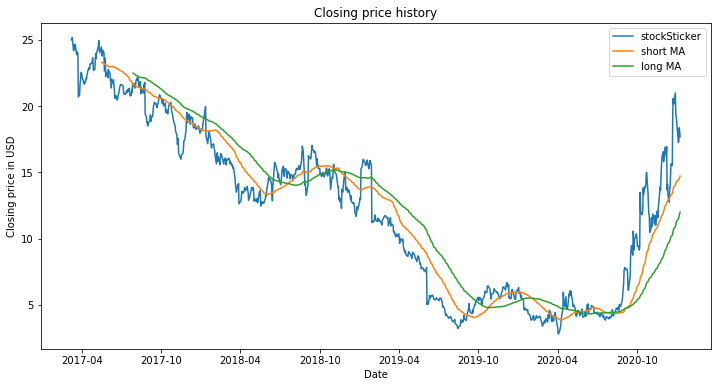

In [133]:
plt.figure(figsize=(12,6))
plt.plot(stock["Close"],label= "stockSticker")
plt.plot(shortMA["Close"],label= "short MA")
plt.plot(longMA["Close"],label= "long MA")
plt.title("Closing price history")
plt.xlabel("Date")
plt.ylabel("Closing price in USD")
plt.legend()
plt.show()



***Do not trade when the short moving average lies below the long moving average and vice versa***

***when the short moving aversge falls below the long moving average[DEATH CROSS]***

***when the short moving average is above the long moving average[GOLD CROSS]***

***Code to automatically detect signals when to buy and sell***


In [134]:
x = (shortMA["Close"] > longMA["Close"])# this simply denotes a good time to buy
x

2017-03-08    False
2017-03-09    False
2017-03-10    False
2017-03-13    False
2017-03-14    False
              ...  
2021-01-04     True
2021-01-05     True
2021-01-06     True
2021-01-07     True
2021-01-08     True
Name: Close, Length: 968, dtype: bool

In [135]:
x = (shortMA["Close"] > longMA["Close"]).astype(int)
x
# if i dont want boolean values i can turn it to integers
# if you want to know how it looks like

2017-03-08    0
2017-03-09    0
2017-03-10    0
2017-03-13    0
2017-03-14    0
             ..
2021-01-04    1
2021-01-05    1
2021-01-06    1
2021-01-07    1
2021-01-08    1
Name: Close, Length: 968, dtype: int32

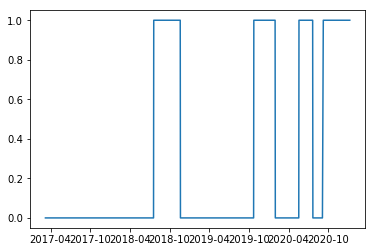

In [136]:
x = (shortMA["Close"] > longMA["Close"]).astype(int)# if you want to view it
plt.plot(x)

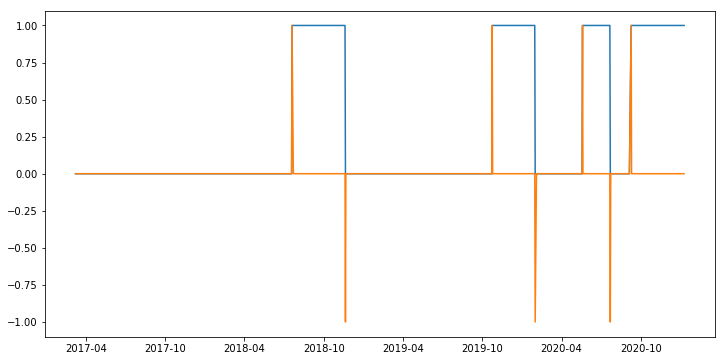

In [137]:
#here we want to capture the crossing,so to do that we would have to get the derivative

##which is implied by the code below....

x = (shortMA["Close"] > longMA["Close"]).astype(int)# this simply denotes a good time to buy
y = x.diff()
plt.figure(figsize=(12,6))
plt.plot(x)
plt.plot(y)

in the diagram above..as we can see,up is buy and down is sell...

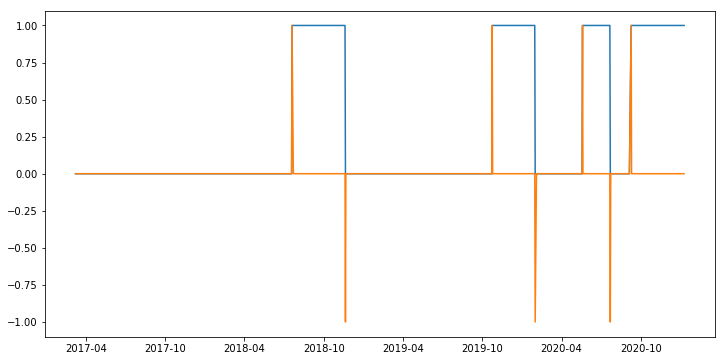

In [138]:
#here we want to capture the crossing,so to do that we would have to get the derivative

##which is implied by the code below....
#3 to compute the buying nd selling signals using pandas

x = (shortMA["Close"] > longMA["Close"]).astype(int)# this simply denotes a good time to buy
crossOverSignals = pd.DataFrame()
crossOverSignals[stockTicker]= stock["Close"]
crossOverSignals["buy"] = stock["Close"][y>0] #when y is ositive you buy
crossOverSignals["sell"] = stock["Close"][y<0]# when y is negative you sell

y = x.diff()
plt.figure(figsize=(12,6))
plt.plot(x)
plt.plot(y) 

## ways to plot the buying and selling signals


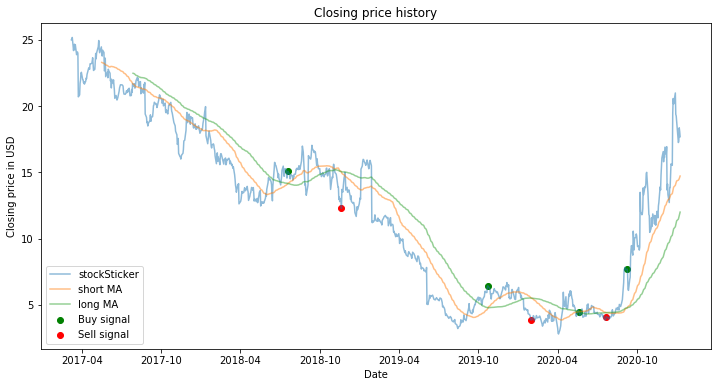

In [139]:
plt.figure(figsize=(12,6))
plt.plot(stock["Close"],label= "stockSticker",alpha = 0.5)
plt.plot(shortMA["Close"],label= "short MA", alpha = 0.5)
plt.plot(longMA["Close"],label= "long MA",alpha = 0.5)
plt.scatter(crossOverSignals["buy"].index,crossOverSignals["buy"], color = "g",label ="Buy signal")
plt.scatter(crossOverSignals["sell"].index,crossOverSignals["sell"], color = "r",label = "Sell signal")
plt.title("Closing price history")
plt.xlabel("Date")
plt.ylabel("Closing price in USD")
plt.legend()
plt.show()

In [140]:
y[y>0] #buying signal date

2018-07-20    1.0
2019-10-24    1.0
2020-05-19    1.0
2020-09-08    1.0
Name: Close, dtype: float64

In [141]:
y[y <0] #selling signal date

2018-11-20   -1.0
2020-01-31   -1.0
2020-07-22   -1.0
Name: Close, dtype: float64

In [142]:
crossOverSignals [y>0]

,GME,buy,sell
2018-07-20,15.08,15.08,NaN
2019-10-24,6.42,6.42,NaN
2020-05-19,4.44,4.44,NaN
2020-09-08,7.70,7.70,NaN


So from  above..we can see how much to buy the stocks per share and the date when to buy it...

In [143]:
crossOverSignals[y<0]

,GME,buy,sell
2018-11-20,12.28,NaN,12.28
2020-01-31,3.84,NaN,3.84
2020-07-22,4.11,NaN,4.11


So from  above..we can see how much to sell the stocks  and the date when to sell it...

***THE END***